In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['NDG', 'MAN']
patterns1= ['NDG(*_*_)]-MAN(*_*_)', 'NDG(*_*_)-MAN(*_*_)','NDG(*_*_)]-[*]-MAN(*_*_)', 'NDG(*_*_)-[*]-MAN(*_*_)']
patterns2= ['DGlcpNAca1-2DManpa', 'DGlcpNAca1-2]DManpa', 'DGlcpNAca1-2[*]DManpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A14', '1AA5', '1AA5', '1AF6', '1AF6', '1AF6', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AGM', '1AGM', '1BHG', '1BHG', '1BJI', '1BRR', '1BRR', '1BXH', '1BXH', '1BZB', '1C0Q', '1C0Q', '1C0R', '1C0R', '1C3N', '1CAP', '1CB8', '1CF3', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1DBG', '1DBO', '1DOG', '1DOG', '1DP5', '1DPJ', '1DSR', '1DZE', '1E05', '1EX2', '1F4Y', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1FE0', '1FE4', '1FEE', '1FI1', '1FQ6', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1G0V', '1GAC', '1GAC', '1GAH', '1GAH', '1GAI', '1GAI', '1GAL', '1GLM', '1GLM', '1GNX', '1GPE', '1GPE', '1GSL', '1GW0', '1GW0', '1GYA', '1GZ9', '1H3X', '1H3Y', '1H4P', '1H4P', '1HFU', '1HH3', '1HH3', '1HH3', '1HH3', '1HHA', '1HHA', '1HHA', '1HHA', '1HHC', '1HHC', '1HHC', '1HHC', '1HHF', '1HHF', '1HHF', '1HHF', '1HM2', '1HM2', '1HM3', '1HM3', '1HMU', '1HMU

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 13 
valid torsion1 and torsion2: (13, 13)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['5.H', '4.H'], ['4C1', '-'])
(['3.C', '2.C'], ['BO3', 'O3B'])
(['5.G', '4.G'], ['1S3', '5S1'])
(['5.C', '4.C'], ['4C1', '-'])
(['5.F', '4.F'], ['4C1', '4C1'])
(['5.Y', '4.Y'], ['1S5', '4C1'])
(['4.a', '3.a'], ['-', '-'])
(['5.f', '4.f'], ['1S3', '-'])
(['5.D', '4.D'], ['BO3', '-'])
(['5.C', '4.C'], ['-', '-'])
(['5.F', '4.F'], ['4C1', '-'])
(['5.D', '4.D'], ['4C1', '-'])
(['5.D', '4.D'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//3fru.pdb H NDG 5 C1
../../pdbs//3fru.pdb H MAN 4 O2
9019 9014
Connection found between 9019 and 9014
../../pdbs//3agv.pdb C NDG 3 C1
../../pdbs//3agv.pdb C MAN 2 O2
4041 4036
Connection found between 4041 and 4036
../../pdbs//6p3r.pdb G NDG 5 C1
../../pdbs//6p3r.pdb G MAN 4 O2
9705 9700
Connection found between 9705 and 9700
../../pdbs//3es6.pdb C NDG 5 C1
../../pdbs//3es6.pdb C MAN 4 O2
3270 3265
Connection found between 3270 and 3265
../../pdbs//1i1a.pdb F NDG 5 C1
../../pdbs//1i1a.pdb F MAN 4 O2
6261 6256
Connection found between 6261 and 6256
../../pdbs//6p3s.pdb Y NDG 5 C1
../../pdbs//6p3s.pdb Y MAN 4 O2
31412 31407
Connection found between(2) 31412 and 31407
../../pdbs//6p3s.pdb a NDG 4 C1
../../pdbs//6p3s.pdb a MAN 3 O2
31588 31583
Connection found between(2) 31588 and 31583
../../pdbs//6p3s.pdb f NDG 5 C1
../../pdbs//6p3s.pdb f MAN 4 O2
32007 32002
Connection found between(2) 32007 and 32002
../../pdbs//5y56.pdb D NDG 5 C1
../../pdbs//5y56.pdb D MAN 4 O2
3485 3480
C

In [13]:
output_df.to_csv('DGlcpNAca1-2DManpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGlcpNAca1-2DManpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [17]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,3fru.pdb,H NDG 5 C2 C1 MAN 4 O2 C2,H NDG 5 C1 MAN 4 O2 C2 C3,206.9200,71.77180,"([NDG(5_H_), MAN(4_H_)], [87.6, 92.62])",FUC(7_H_)-[GAL(6_H_)-NDG(5_H_)-MAN(4_H_)-BMA(3...,DGalpb1-4DGlcpNAca1-2DManpa1-6DManpb1-4DGlcpNA...,"([5.H, 4.H], [4C1, -])"
1,3agv.pdb,C NDG 3 C2 C1 MAN 2 O2 C2,C NDG 3 C1 MAN 2 O2 C2 C3,213.9100,65.53860,"([NDG(3_C_), MAN(2_C_)], [108.7, 111.89])",GLA(4_C_)-NDG(3_C_)-MAN(2_C_)-MAN(1_C_),DGalpa1-4DGlcpNAca1-2DManpa1-6DManpa1-ROH,"([3.C, 2.C], [BO3, O3B])"
2,6p3r.pdb,G NDG 5 C2 C1 MAN 4 O2 C2,G NDG 5 C1 MAN 4 O2 C2 C3,146.2470,128.01300,"([NDG(5_G_), MAN(4_G_)], [143.51, 168.91])",SIA(7_G_)-GLA(6_G_)-NDG(5_G_)-MAN(4_G_)-[MAN(8...,DNeup5Aca2-6DGalpa1-4DGlcpNAca1-2DManpa1-6[DMa...,"([5.G, 4.G], [1S3, 5S1])"
3,3es6.pdb,C NDG 5 C2 C1 MAN 4 O2 C2,C NDG 5 C1 MAN 4 O2 C2 C3,214.2080,1.73999,"([NDG(5_C_), MAN(4_C_)], [35.02, 34.61])",NDG(5_C_)-MAN(4_C_)-BMA(3_C_)-NAG(2_C_)-NAG(1_...,DGlcpNAca1-2DManpa1-3DManpb1-4DGlcpNAcb1-4DGlc...,"([5.C, 4.C], [4C1, -])"
4,1i1a.pdb,F NDG 5 C2 C1 MAN 4 O2 C2,F NDG 5 C1 MAN 4 O2 C2 C3,56.0123,114.05500,"([NDG(5_F_), MAN(4_F_)], [178.47, 191.58])",FUC(6_F_)-[NDG(5_F_)-MAN(4_F_)-BMA(3_F_)-NAG(2...,DGlcpNAca1-2DManpa1-3DManpb1-4DGlcpNAcb1-4[LFu...,"([5.F, 4.F], [4C1, 4C1])"
5,6p3s.pdb,Y NDG 5 C2 C1 MAN 4 O2 C2,Y NDG 5 C1 MAN 4 O2 C2 C3,219.4630,349.73520,"([NDG(5_Y_), MAN(4_Y_)], [148.46, 141.38])",SIA(7_Y_)-GAL(6_Y_)-NDG(5_Y_)-MAN(4_Y_)-MAN(3_...,DNeup5Aca2-6DGalpb1-4DGlcpNAca1-2DManpa1-6DMan...,"([5.Y, 4.Y], [1S5, 4C1])"
6,6p3s.pdb,a NDG 4 C2 C1 MAN 3 O2 C2,a NDG 4 C1 MAN 3 O2 C2 C3,201.8080,90.54110,"([NDG(4_a_), MAN(3_a_)], [129.97, 142.57])",SIA(6_a_)-GLA(5_a_)-NDG(4_a_)-MAN(3_a_)-MAN(2_...,DKdnpa2-6DGalpa1-4DGlcpNAca1-2DManpa1-6DManpa1...,"([4.a, 3.a], [-, -])"
7,6p3s.pdb,f NDG 5 C2 C1 MAN 4 O2 C2,f NDG 5 C1 MAN 4 O2 C2 C3,206.2980,60.93680,"([NDG(5_f_), MAN(4_f_)], [142.55, 155.25])",SIA(7_f_)-GAL(6_f_)-NDG(5_f_)-MAN(4_f_)-BMA(3_...,DNeup5Aca2-6DGalpb1-4DGlcpNAca1-2DManpa1-6DMan...,"([5.f, 4.f], [1S3, -])"
8,5y56.pdb,D NDG 5 C2 C1 MAN 4 O2 C2,D NDG 5 C1 MAN 4 O2 C2 C3,142.2870,95.44090,"([NDG(5_D_), MAN(4_D_)], [130.65, 168.12])",GAL(6_D_)-NDG(5_D_)-MAN(4_D_)-[BMA(7_D_)]-BMA(...,DGalpb1-4DGlcpNAca1-2DManpa1-6[DManpb1-3]DManp...,"([5.D, 4.D], [BO3, -])"
9,5y56.pdb,C NDG 5 C2 C1 MAN 4 O2 C2,C NDG 5 C1 MAN 4 O2 C2 C3,131.4780,106.76200,"([NDG(5_C_), MAN(4_C_)], [109.86, 108.25])",FUL(9_C_)-[GAL(6_C_)-NDG(5_C_)-MAN(4_C_)-[NAG(...,DGalpb1-4DGlcpNAca1-2DManpa1-6[DGlcpNAcb1-2DMa...,"([5.C, 4.C], [-, -])"


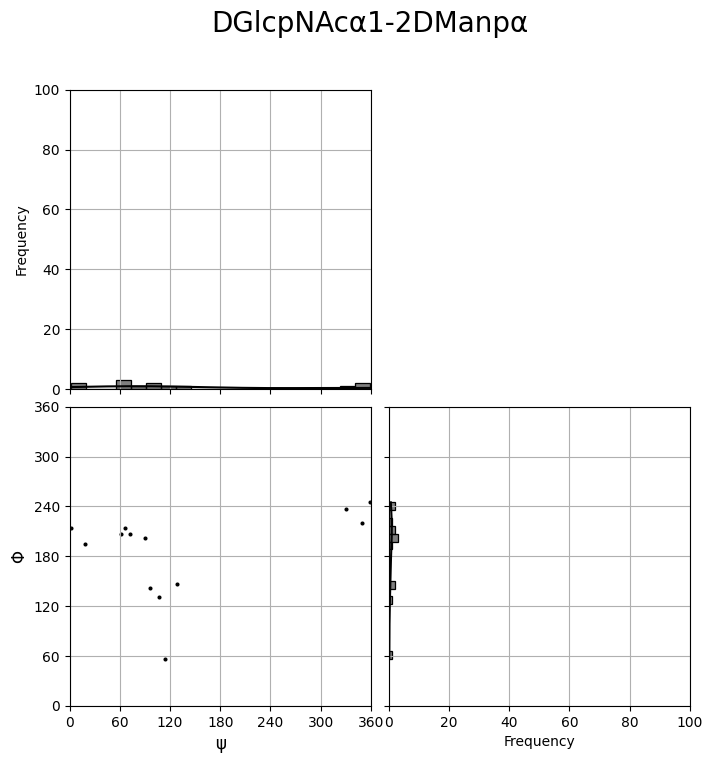

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGlcpNAcα1-2DManpα',max_histogram_scale=100,step_histogram_tick=20)